In [10]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

%matplotlib inline

In [11]:
'''
Try to predict the weather
Weather Code:
0 / 100 : Clear Skies
1 / 101 : Partly Cloudy
2 / 102 : Partly Cloudy
3 / 103 : Mostly Cloudy
4 / 104 : Overcast
10 : Smoke
45 : Fog
60 : Light Rain
61 : Rain
63 : Heavy Rain
80 : Isolated Shower
95 : Severe Thunderstorm
97 : Severe Thunderstorm
'''

'\nTry to predict the weather\nWeather Code:\n0 / 100 : Clear Skies\n1 / 101 : Partly Cloudy\n2 / 102 : Partly Cloudy\n3 / 103 : Mostly Cloudy\n4 / 104 : Overcast\n10 : Smoke\n45 : Fog\n60 : Light Rain\n61 : Rain\n63 : Heavy Rain\n80 : Isolated Shower\n95 : Severe Thunderstorm\n97 : Severe Thunderstorm\n'

In [12]:
headers = ['location_ID','dateTime','min_temperature_C','max_temperature_C','min_humidity_percentage','max_humidity_percentage','humidity_percentage','temperature_C','weather_code','wind_direction','wind_speed_KM/h']

In [13]:
df = pd.read_csv('kecamatanforecast-jawatimur.csv', names=headers)

In [14]:
df.shape

(1480, 11)

In [23]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   location_ID              1480 non-null   int64         
 1   dateTime                 1480 non-null   datetime64[ns]
 2   min_temperature_C        1480 non-null   float64       
 3   max_temperature_C        1480 non-null   float64       
 4   min_humidity_percentage  1480 non-null   float64       
 5   max_humidity_percentage  1480 non-null   float64       
 6   humidity_percentage      1480 non-null   int64         
 7   temperature_C            1480 non-null   int64         
 8   wind_direction           1480 non-null   object        
 9   wind_speed_KM/h          1480 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(4), object(1)
memory usage: 115.8+ KB


In [15]:
df.head(15)

,location_ID,dateTime,min_temperature_C,max_temperature_C,min_humidity_percentage,max_humidity_percentage,humidity_percentage,temperature_C,weather_code,wind_direction,wind_speed_KM/h
0,5008378,2020-01-05 00:00:00,NaN,NaN,NaN,NaN,90,26,1,W,20
1,5008378,2020-01-05 03:00:00,NaN,NaN,NaN,NaN,80,29,1,W,20
2,5008378,2020-01-05 06:00:00,NaN,NaN,NaN,NaN,65,32,95,W,30
3,5008378,2020-01-05 09:00:00,NaN,NaN,NaN,NaN,80,28,1,W,20
4,5008378,2020-01-05 12:00:00,25.0,32.0,65.0,90.0,85,26,1,W,20
5,5008378,2020-01-05 15:00:00,NaN,NaN,NaN,NaN,90,26,1,W,10
6,5008378,2020-01-05 18:00:00,NaN,NaN,NaN,NaN,90,25,1,SW,10
7,5008378,2020-01-05 21:00:00,NaN,NaN,NaN,NaN,90,25,5,SW,10
8,5008378,2020-01-06 00:00:00,NaN,NaN,NaN,NaN,95,26,1,W,10
9,5008378,2020-01-06 03:00:00,NaN,NaN,NaN,NaN,75,30,80,W,10


In [16]:
df['dateTime'] = pd.to_datetime(df.dateTime)

In [17]:
#convert date to day name
df['dayOfTheWeek'] = df.dateTime.dt.day_name()

In [18]:
df.head(15)

,location_ID,dateTime,min_temperature_C,max_temperature_C,min_humidity_percentage,max_humidity_percentage,humidity_percentage,temperature_C,weather_code,wind_direction,wind_speed_KM/h,dayOfTheWeek
0,5008378,2020-01-05 00:00:00,NaN,NaN,NaN,NaN,90,26,1,W,20,Sunday
1,5008378,2020-01-05 03:00:00,NaN,NaN,NaN,NaN,80,29,1,W,20,Sunday
2,5008378,2020-01-05 06:00:00,NaN,NaN,NaN,NaN,65,32,95,W,30,Sunday
3,5008378,2020-01-05 09:00:00,NaN,NaN,NaN,NaN,80,28,1,W,20,Sunday
4,5008378,2020-01-05 12:00:00,25.0,32.0,65.0,90.0,85,26,1,W,20,Sunday
5,5008378,2020-01-05 15:00:00,NaN,NaN,NaN,NaN,90,26,1,W,10,Sunday
6,5008378,2020-01-05 18:00:00,NaN,NaN,NaN,NaN,90,25,1,SW,10,Sunday
7,5008378,2020-01-05 21:00:00,NaN,NaN,NaN,NaN,90,25,5,SW,10,Sunday
8,5008378,2020-01-06 00:00:00,NaN,NaN,NaN,NaN,95,26,1,W,10,Monday
9,5008378,2020-01-06 03:00:00,NaN,NaN,NaN,NaN,75,30,80,W,10,Monday


In [19]:
X = df.drop('weather_code', axis = 1)

In [20]:
X = X[['location_ID', 'dateTime', 'min_temperature_C', 'max_temperature_C', 'min_humidity_percentage', 'max_humidity_percentage', 'humidity_percentage', 'temperature_C', 'wind_direction', 'wind_speed_KM/h']]

In [21]:
X.fillna(0, inplace = True)

In [22]:
X.head(2)

,location_ID,dateTime,min_temperature_C,max_temperature_C,min_humidity_percentage,max_humidity_percentage,humidity_percentage,temperature_C,wind_direction,wind_speed_KM/h
0,5008378,2020-01-05 00:00:00,0.0,0.0,0.0,0.0,90,26,W,20
1,5008378,2020-01-05 03:00:00,0.0,0.0,0.0,0.0,80,29,W,20


In [24]:
kmean = KMeans(n_clusters=5, random_state=0).fit(X)

TypeError: invalid type promotion

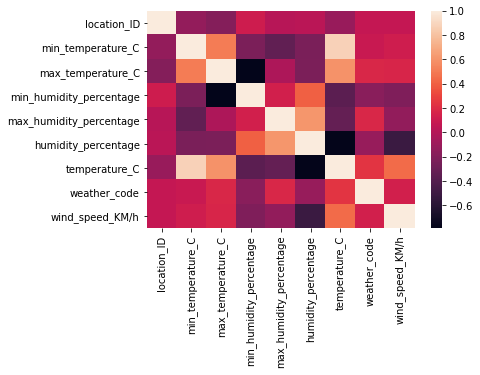

In [25]:
sns.heatmap(df.corr())

In [26]:
df.cov()

,location_ID,min_temperature_C,max_temperature_C,min_humidity_percentage,max_humidity_percentage,humidity_percentage,temperature_C,weather_code,wind_speed_KM/h
location_ID,4.008098e+12,-413871.748062,-1.005993e+06,2.300642e+06,189020.484496,604236.152806,-567557.630832,5.710266e+06,916134.306964
min_temperature_C,-4.138717e+05,2.731496,2.236075e+00,-3.760139e+00,-2.418216,-2.055236,2.534749,5.581620e+00,1.086319
max_temperature_C,-1.005993e+06,2.236075,7.170094e+00,-2.125056e+01,-0.280521,-3.242495,2.801188,1.686753e+01,2.433480
min_humidity_percentage,2.300642e+06,-3.760139,-2.125056e+01,1.016102e+02,5.923573,21.964323,-6.396771,-6.004931e+01,-11.250786
max_humidity_percentage,1.890205e+05,-2.418216,-2.805214e-01,5.923573e+00,18.580707,14.304047,-2.438044,2.671845e+01,-3.001257
humidity_percentage,6.042362e+05,-2.055236,-3.242495e+00,2.196432e+01,14.304047,81.471045,-18.867642,-4.104150e+01,-29.533286
temperature_C,-5.675576e+05,2.534749,2.801188e+00,-6.396771e+00,-2.438044,-18.867642,7.223558,2.566407e+01,7.610854
weather_code,5.710266e+06,5.581620,1.686753e+01,-6.004931e+01,26.718446,-41.041500,25.664075,1.527097e+03,33.614705
wind_speed_KM/h,9.161343e+05,1.086319,2.433480e+00,-1.125079e+01,-3.001257,-29.533286,7.610854,3.361470e+01,40.903048
